<a href="https://colab.research.google.com/github/nguyen084/Logistic-Regression/blob/master/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hieu Nguyen \
Homework 4 \
CSE 5095: Introductory to Machine Learning

Exercise 1: Curse of Dimensionality
1. We would need $(c+1)^n$  points to sample the n grid.

In [0]:
#2 and #3. Euclidian Distance
import random
from scipy.spatial import distance
def sample(d=10, N=101):
    sample_result = [[random.uniform(0., 1.) for i in range(d)] for _ in range(N)]
    onesample = sample_result.pop()
    distancelist = []
    for i in range(len(sample_result)):
      distancelist.append(distance.euclidean(onesample, sample_result[i]))
    r = (max(distancelist)-min(distancelist))/min(distancelist)
    print(r)
    return r

In [0]:
nlist = [10,100,1000,10000,100000]
result = []
for i in nlist:
  result.append(sample(d=i))


2.417153724956984
0.2432231659200149
0.08434916944329332
0.024390737968986966
0.00949832622897598


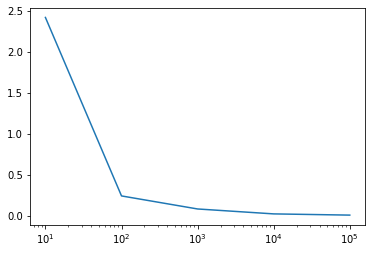

In [0]:
from matplotlib import pyplot
pyplot.plot(nlist,result)
pyplot.xscale('log')
pyplot.show()

3. This can be problematic in machine learning algorithm such as k-mean because as the dimension increases, the distance between the clusters appoach 0, thus make the cluster inseparable

4. There are many way to combat with large dimensionality. One of which is using Principal Component Analysis to compute the variance between the features and selects the best principal component that explain most of the variance as new features.

In [0]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir(r'/content/gdrive/My Drive/Academic/UCONN/MATH5095Machine Learning/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
from PIL import Image
image = Image.open("Jon.jpg")
width = image.size[0]
length = image.size[1]
jonathancolor = np.array(image.getdata()) # color data for K-means
jonathan = jonathancolor.reshape(length*width, 3)

In [0]:
print('1. The image has',width*length,'pixels')

1. The image has 1896100 pixels


In [0]:
from sklearn import cluster
import matplotlib.pyplot as plt
def kmeanJon(n_clusters):
  kmeans_cluster = cluster.KMeans(n_clusters)
  kmeans_cluster.fit(jonathan)
  cluster_centers = (kmeans_cluster.cluster_centers_)
  cluster_labels = kmeans_cluster.labels_
  jonathan_compressed_k=cluster_centers[cluster_labels].reshape(length,width,3).astype("uint8")
  plt.figure(1)
  plt.clf()
  plt.title("compressed image")
  plt.imshow(jonathan_compressed_k)

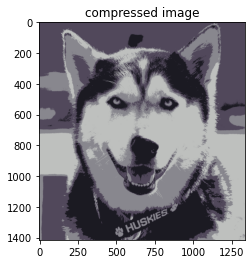

In [0]:
kmeanJon(4)

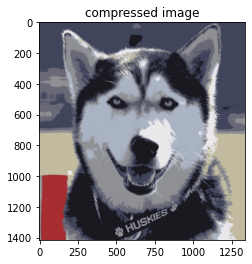

In [0]:
kmeanJon(8)

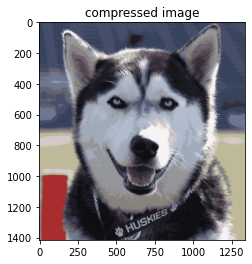

In [0]:
kmeanJon(16)

Excercise 3: 
1. The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.
2. $\frac{dL}{dW_j} = (\hat{y}-y)f'(z)z'$ \
where \
$f'(z) = \frac{e^{-z}}{1+e^{-z}}$ \
and $z' = h$ \
$\frac{dL}{dW_j} = (\hat{y}-y)\frac{e^{-z}}{1+e^{-z}}h$

3. Recognizing a constellation of features is impossible with back-propagation since hidden layers cannot interpret it. So if neural network is quite certain about its class prediction, and a new class with similar feature was introduce, the weights can be hard to update. This experically bad at the output layer because the output layer determine the certainty of the class and pass it backward to the hidden layers. 
4. a) It has to do with the opjective function as we want to maximize to likelihood estimate and transform it into a minimization problem, so we minimize the negative of the log likelihood. 
b) The range is from inifity to 0. 
5. $\frac{dL}{dW_j} = (\frac{-y}{\hat{y}}+\frac{1-y}{1-\hat{y}})f'(z)z' 
= (\frac{-y}{f(z)}+\frac{1-y}{1-f(z)})f(z)(1-f(z))z' = (-y+yf(z)+f(z)-yf(z))z' = (\hat{y}-y)h$ 
6. No, it is different in part 3. Different from signoid where we get the probability between 0 and 1 of the class. In cross-entropy, the ground truth and and score are seperate for the two classes, so when making the prediction, we take the the estimate score which is higher. 